In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_csv('../data/X_train.csv', index_col=0)
y_train = np.ravel(pd.read_csv('../data/y_train.csv', index_col=0))
X_test = pd.read_csv('../data/X_test.csv', index_col=0)
y_test = np.ravel(pd.read_csv('../data/y_test.csv', index_col=0))

In [3]:
lr = LogisticRegression(random_state=17)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3635
           1       0.66      0.56      0.61      1295

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.80      4930



In [4]:
y_test_pred = lr.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.51      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [5]:
rfc = RandomForestClassifier(random_state=17)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



In [6]:
y_test_pred = rfc.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1539
           1       0.62      0.44      0.52       574

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



In [7]:
svc = SVC(random_state=17)
svc.fit(X_train, y_train)
y_train_pred = svc.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3635
           1       0.71      0.52      0.60      1295

    accuracy                           0.82      4930
   macro avg       0.78      0.72      0.74      4930
weighted avg       0.81      0.82      0.81      4930



In [8]:
y_test_pred = svc.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1539
           1       0.65      0.44      0.53       574

    accuracy                           0.78      2113
   macro avg       0.73      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



## Parameter tuning the most promising default model

Judging from the performance of each type of model with default hyperparameters, the logistic regression classifier actually performed best in both recall (our chosen key metric) and overall accuracy. Let's take a pass at hyperparameter tuning.

Scikit-learn's `LogisticRegression` classifier accepts several parameter arguments. Two of the important parameters we'll focus on are the solver and the penalty term. Per the scikit-learn documentation, not all solvers work with all penalties. As such, we cannot execute one grid search for all combinations. We will perform a series of smaller grid searches, one for each solver, then compare the performance of the resulting best parameter combination from each. From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

>The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
>   * ‘newton-cg’ - [‘l2’, ‘none’]
>   * ‘lbfgs’ - [‘l2’, ‘none’]
>   * ‘liblinear’ - [‘l1’, ‘l2’]
>   * ‘sag’ - [‘l2’, ‘none’]
>   * ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

Using no penalty (i.e., `penalty = 'none'`) ignores the C parameter, so I will omit that value from all of my grids for the sake of simplicity. Follow-up work on this project could be to come back and explore using no penalty.

I could not reach convergence with the elasticnet solver with up to 500 max iterations, despite having rescaled my data, so I've omitted that solver entirely.

_I referred to [this blog post](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/) for additional guidance here._

In [9]:
param_grid_newton = {
    'solver':['newton-cg'],
    'penalty':['l2'],
    'C':[100,10,1.0,0.1,0.01],
    'random_state':[42]
}

lr_grid_newton = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_newton)
lr_grid_newton.fit(X_train, y_train)
lr_grid_newton.best_params_

{'C': 0.1, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}

In [10]:
param_grid_lbfgs = {
    'solver':['lbfgs'],
    'penalty':['l2'],
    'C':[100,10,1.0,0.1,0.01],
    'random_state':[42]
}

lr_grid_lbfgs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lbfgs)
lr_grid_lbfgs.fit(X_train, y_train)
lr_grid_lbfgs.best_params_

{'C': 0.1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}

In [11]:
param_grid_liblinear = {
    'solver':['liblinear'],
    'penalty':['l1','l2'],
    'C':[100,10,1.0,0.1,0.01],
    'random_state':[42]
}

lr_grid_liblinear = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_liblinear)
lr_grid_liblinear.fit(X_train, y_train)
lr_grid_liblinear.best_params_

{'C': 0.1, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}

In [12]:
param_grid_sag = {
    'solver':['sag'],
    'penalty':['l2'],
    'C':[100,10,1.0,0.1,0.01],
    'random_state':[42],
    'max_iter':[500]
}

lr_grid_sag = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_sag)
lr_grid_sag.fit(X_train, y_train)
lr_grid_sag.best_params_

{'C': 0.1,
 'max_iter': 500,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'sag'}

We can see that across all four solvers, the best penalty term was l2 and the best C term was 0.1. Let's run our four best models, record accuracy and recall scores, and compare.

In [13]:
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []

# newton solver
y_train_pred = lr_grid_newton.predict(X_train)
accuracy_train.append(accuracy_score(y_train, y_train_pred))
recall_train.append(recall_score(y_train,y_train_pred))

y_test_pred = lr_grid_newton.predict(X_test)
accuracy_test.append(accuracy_score(y_test, y_test_pred))
recall_test.append(recall_score(y_test,y_test_pred))

# lbfgs solver
y_train_pred = lr_grid_lbfgs.predict(X_train)
accuracy_train.append(accuracy_score(y_train, y_train_pred))
recall_train.append(recall_score(y_train,y_train_pred))

y_test_pred = lr_grid_lbfgs.predict(X_test)
accuracy_test.append(accuracy_score(y_test, y_test_pred))
recall_test.append(recall_score(y_test,y_test_pred))

# liblinear solver
y_train_pred = lr_grid_liblinear.predict(X_train)
accuracy_train.append(accuracy_score(y_train, y_train_pred))
recall_train.append(recall_score(y_train,y_train_pred))

y_test_pred = lr_grid_liblinear.predict(X_test)
accuracy_test.append(accuracy_score(y_test, y_test_pred))
recall_test.append(recall_score(y_test,y_test_pred))

# sag solver
y_train_pred = lr_grid_sag.predict(X_train)
accuracy_train.append(accuracy_score(y_train, y_train_pred))
recall_train.append(recall_score(y_train,y_train_pred))

y_test_pred = lr_grid_sag.predict(X_test)
accuracy_test.append(accuracy_score(y_test, y_test_pred))
recall_test.append(recall_score(y_test,y_test_pred))

In [14]:
lr_metrics_by_solver = pd.DataFrame(list(zip(accuracy_train, accuracy_test, recall_train, recall_test)),
                                    columns=['accuracy_train','accuracy_test','recall_train','recall_test'],
                                    index=['newton','lbfgs','liblinear','sag']
                                   )

lr_metrics_by_solver

,accuracy_train,accuracy_test,recall_train,recall_test
newton,0.809736,0.790819,0.553668,0.494774
lbfgs,0.809736,0.790819,0.553668,0.494774
liblinear,0.809331,0.789872,0.552124,0.494774
sag,0.809736,0.790819,0.553668,0.494774


Well, this was a useful learning exercise insofar as we learned that using different solvers with identical penalty and C terms produces identical model performance, with the exception of the liblinear solver, which produced ever-so-slightly worse results than the others.

It's also notable that these results overall are slightly worse than the default LogisticRegression results found at the very start! A good sign that I probably need to do a more in-depth round of parameter tuning, and/or further processing of my data. For now, though, we can move forward with the default LR model.

## Model evaluation

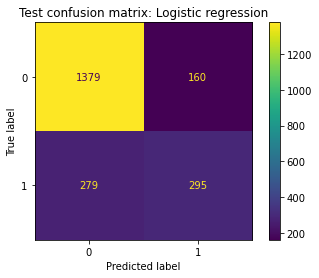

In [16]:
lr = LogisticRegression(random_state=17)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.title('Test confusion matrix: Logistic regression')
plt.savefig('../images/ConfusionMatrix.png',bbox_inches='tight',facecolor='white')
plt.show()

In [17]:
accuracy_score(y_test, y_pred)

0.792238523426408

In [18]:
recall_score(y_test, y_pred)

0.5139372822299652

In [19]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.8321843452352653

In this particular test split, we had 574 churned customers, only 295 of which were correctly identified as churned, leaving 279 false negatives. With a recall score of just 0.5139, we are not doing a terribly great job minimizing our false negatives, even though we have what would appear to be a modestly good accuracy at 0.7922. Still, if using this model, we would be able to correctly intervene in the cases of just over half of the right customers, using a fraction of the resources required to intervene with _all_ customers, which would be the only way to guarantee 100% coverage.